## Simple Linear Regression

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#Importing the dataset and printing the dataframe
df = pd.read_csv('salaries.csv')
print(df.head())

   Years of Experience  Salary
0                  1.1   39343
1                  1.3   46205
2                  1.5   37731
3                  2.0   43525
4                  2.2   39891


In [3]:
#sperating the independent and dependent variable
experience = df['Years of Experience'].values  # Independent variable
salary = df['Salary'].values                  # Dependent variable

In [4]:
print(experience)

[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5]


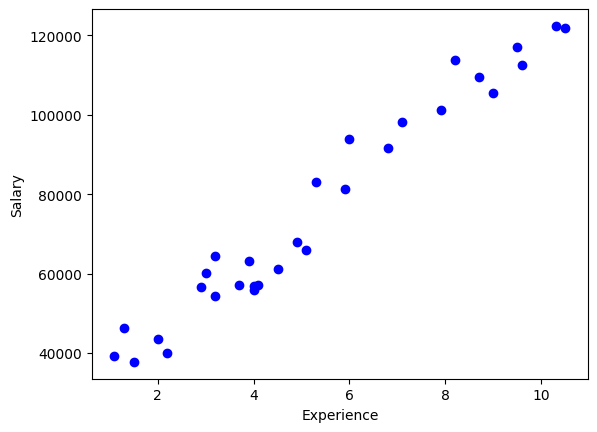

In [5]:
#Scatter plot: it is done to see if a linear relationship exists between the features so that linear model can be used.
plt.scatter(experience, salary, color='blue')
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()


In [7]:
# Calculating the gradients using each parameter
# linear Equation (mathematical formulation) y=a0+a1x
# Initializing the parameters(slope and intercept)
a0=0 # Inrercept
a1=0 #Slope
lr = 0.0001 #Learning Rate: Since many there are multiple gradients it is used to control the update size
iterations = 1000 # total number of training steps
error = [] #initially empty, used to store cost after each iteration which is later used for plotting

# Loop for the Gradient Descent for 1000 iterations
for itr in range(iterations):
    error_cost = 0       # Accumulate cost (MSE)
    cost_a0 = 0          # Gradient accumulator for a0
    cost_a1 = 0          # Gradient accumulator for a1

    for i in range(len(experience)):
        y_pred = a0 + a1 * experience[i]  # predicts salary at a data point
        error_cost += (salary[i] - y_pred) ** 2  
        
        for j in range(len(experience)):
            #Calculating gradients 
            partial_wrt_a0 = -2 * (salary[j] - (a0 + a1 * experience[j])) #gradient for a0
            partial_wrt_a1 = (-2 * experience[j]) * (salary[j] - (a0 + a1 * experience[j])) #gradient for a1
            
            cost_a0 += partial_wrt_a0
            cost_a1 += partial_wrt_a1
        
        #Updating a0 and a1 to reduce the error
        a0 = a0 - lr * cost_a0
        a1 = a1 - lr * cost_a1
            
        print(itr, a0, a1)
    error.append(error_cost)  # saving the total error in the array for the iteration


0 456.01800000000003 2864.3922000000002
0 1274.0010686639998 7959.64359174
0 2286.604693211344 14158.593049235977
0 3290.130743189777 20089.36579117248
0 4089.485027286493 24438.329417543722
0 4541.2264593881955 26240.189474113875
0 4585.201292298819 25091.16248580272
0 4257.776657408259 21238.151267111112
0 3683.7511001777466 15524.229839758618
0 3048.728589054663 9202.476558960621
0 2558.056753697587 3659.266826352171
0 2391.397151394218 108.1308832611353
0 2662.9599536241185 -678.2176848890798
0 3396.184575926539 1461.4936253436986
0 4518.457673997443 6041.497998859166
0 5877.035069820732 12036.278424174128
0 7272.651699062426 18107.051403999176
0 8503.397619350251 22897.43063925389
0 9409.171065142562 25332.97899726095
0 9906.892114111337 24858.498420403175
0 10008.700880752991 21560.656814298407
0 9819.121702870294 16148.872086545347
0 9511.81975265131 9798.674701002332
0 9291.083134448463 3892.1390988581898
0 9346.536622967327 -287.29529287542573
0 9811.087865685256 -1838.2205593

51 25792.200198668652 9449.962321455081
51 25792.200198668652 9449.962321455081
51 25792.200198668652 9449.962321455081
51 25792.200198668652 9449.962321455081
51 25792.200198668652 9449.962321455083
51 25792.200198668652 9449.962321455085
51 25792.200198668652 9449.962321455085
51 25792.200198668652 9449.962321455085
51 25792.200198668652 9449.962321455085
51 25792.200198668652 9449.962321455085
51 25792.200198668652 9449.962321455083
51 25792.200198668652 9449.962321455081
51 25792.200198668652 9449.962321455081
52 25792.200198668652 9449.962321455081
52 25792.200198668652 9449.962321455081
52 25792.200198668652 9449.962321455083
52 25792.200198668652 9449.962321455085
52 25792.200198668652 9449.962321455085
52 25792.200198668652 9449.962321455085
52 25792.200198668652 9449.962321455085
52 25792.200198668652 9449.962321455085
52 25792.200198668652 9449.962321455085
52 25792.200198668652 9449.962321455083
52 25792.200198668652 9449.962321455081
52 25792.200198668652 9449.962321455081


112 25792.200198668652 9449.962321455085
112 25792.200198668652 9449.962321455085
112 25792.200198668652 9449.962321455085
112 25792.200198668652 9449.962321455085
112 25792.200198668652 9449.962321455085
112 25792.200198668652 9449.962321455085
112 25792.200198668652 9449.962321455083
112 25792.200198668652 9449.962321455081
112 25792.200198668652 9449.962321455081
112 25792.200198668652 9449.962321455081
112 25792.200198668652 9449.962321455081
112 25792.200198668652 9449.962321455081
112 25792.200198668652 9449.962321455081
112 25792.200198668652 9449.962321455083
112 25792.200198668652 9449.962321455085
112 25792.200198668652 9449.962321455085
112 25792.200198668652 9449.962321455085
112 25792.200198668652 9449.962321455085
112 25792.200198668652 9449.962321455085
112 25792.200198668652 9449.962321455083
112 25792.200198668652 9449.962321455081
112 25792.200198668652 9449.962321455081
112 25792.200198668652 9449.962321455081
112 25792.200198668652 9449.962321455081
112 25792.200198

187 25792.200198668652 9449.962321455081
187 25792.200198668652 9449.962321455081
187 25792.200198668652 9449.962321455081
187 25792.200198668652 9449.962321455081
187 25792.200198668652 9449.962321455081
187 25792.200198668652 9449.962321455081
187 25792.200198668652 9449.962321455083
187 25792.200198668652 9449.962321455085
187 25792.200198668652 9449.962321455085
187 25792.200198668652 9449.962321455085
187 25792.200198668652 9449.962321455085
187 25792.200198668652 9449.962321455085
187 25792.200198668652 9449.962321455083
187 25792.200198668652 9449.962321455081
187 25792.200198668652 9449.962321455081
187 25792.200198668652 9449.962321455081
187 25792.200198668652 9449.962321455081
187 25792.200198668652 9449.962321455081
187 25792.200198668652 9449.962321455083
187 25792.200198668652 9449.962321455085
187 25792.200198668652 9449.962321455085
187 25792.200198668652 9449.962321455085
187 25792.200198668652 9449.962321455085
187 25792.200198668652 9449.962321455085
187 25792.200198

239 25792.200198668652 9449.962321455081
239 25792.200198668652 9449.962321455081
239 25792.200198668652 9449.962321455081
239 25792.200198668652 9449.962321455083
239 25792.200198668652 9449.962321455085
239 25792.200198668652 9449.962321455085
239 25792.200198668652 9449.962321455085
239 25792.200198668652 9449.962321455085
239 25792.200198668652 9449.962321455085
239 25792.200198668652 9449.962321455083
239 25792.200198668652 9449.962321455081
239 25792.200198668652 9449.962321455081
240 25792.200198668652 9449.962321455081
240 25792.200198668652 9449.962321455081
240 25792.200198668652 9449.962321455083
240 25792.200198668652 9449.962321455085
240 25792.200198668652 9449.962321455085
240 25792.200198668652 9449.962321455085
240 25792.200198668652 9449.962321455085
240 25792.200198668652 9449.962321455085
240 25792.200198668652 9449.962321455085
240 25792.200198668652 9449.962321455083
240 25792.200198668652 9449.962321455081
240 25792.200198668652 9449.962321455081
240 25792.200198

288 25792.200198668652 9449.962321455083
288 25792.200198668652 9449.962321455081
288 25792.200198668652 9449.962321455081
288 25792.200198668652 9449.962321455081
288 25792.200198668652 9449.962321455081
288 25792.200198668652 9449.962321455081
288 25792.200198668652 9449.962321455081
288 25792.200198668652 9449.962321455083
288 25792.200198668652 9449.962321455085
288 25792.200198668652 9449.962321455085
288 25792.200198668652 9449.962321455085
288 25792.200198668652 9449.962321455085
288 25792.200198668652 9449.962321455085
288 25792.200198668652 9449.962321455083
288 25792.200198668652 9449.962321455081
288 25792.200198668652 9449.962321455081
288 25792.200198668652 9449.962321455081
288 25792.200198668652 9449.962321455081
288 25792.200198668652 9449.962321455081
288 25792.200198668652 9449.962321455083
288 25792.200198668652 9449.962321455085
289 25792.200198668652 9449.962321455085
289 25792.200198668652 9449.962321455085
289 25792.200198668652 9449.962321455083
289 25792.200198

337 25792.200198668652 9449.962321455083
337 25792.200198668652 9449.962321455081
337 25792.200198668652 9449.962321455081
337 25792.200198668652 9449.962321455081
337 25792.200198668652 9449.962321455081
337 25792.200198668652 9449.962321455081
337 25792.200198668652 9449.962321455083
337 25792.200198668652 9449.962321455085
337 25792.200198668652 9449.962321455085
337 25792.200198668652 9449.962321455085
337 25792.200198668652 9449.962321455085
337 25792.200198668652 9449.962321455085
337 25792.200198668652 9449.962321455083
337 25792.200198668652 9449.962321455081
337 25792.200198668652 9449.962321455081
338 25792.200198668652 9449.962321455081
338 25792.200198668652 9449.962321455081
338 25792.200198668652 9449.962321455083
338 25792.200198668652 9449.962321455085
338 25792.200198668652 9449.962321455085
338 25792.200198668652 9449.962321455085
338 25792.200198668652 9449.962321455085
338 25792.200198668652 9449.962321455085
338 25792.200198668652 9449.962321455085
338 25792.200198

398 25792.200198668652 9449.962321455085
398 25792.200198668652 9449.962321455085
398 25792.200198668652 9449.962321455085
398 25792.200198668652 9449.962321455085
398 25792.200198668652 9449.962321455085
398 25792.200198668652 9449.962321455083
398 25792.200198668652 9449.962321455081
398 25792.200198668652 9449.962321455081
398 25792.200198668652 9449.962321455081
398 25792.200198668652 9449.962321455081
398 25792.200198668652 9449.962321455081
398 25792.200198668652 9449.962321455083
398 25792.200198668652 9449.962321455085
399 25792.200198668652 9449.962321455085
399 25792.200198668652 9449.962321455085
399 25792.200198668652 9449.962321455083
399 25792.200198668652 9449.962321455081
399 25792.200198668652 9449.962321455081
399 25792.200198668652 9449.962321455081
399 25792.200198668652 9449.962321455081
399 25792.200198668652 9449.962321455081
399 25792.200198668652 9449.962321455081
399 25792.200198668652 9449.962321455083
399 25792.200198668652 9449.962321455085
399 25792.200198

461 25792.200198668652 9449.962321455081
461 25792.200198668652 9449.962321455083
461 25792.200198668652 9449.962321455085
461 25792.200198668652 9449.962321455085
461 25792.200198668652 9449.962321455085
461 25792.200198668652 9449.962321455085
461 25792.200198668652 9449.962321455085
461 25792.200198668652 9449.962321455083
461 25792.200198668652 9449.962321455081
461 25792.200198668652 9449.962321455081
462 25792.200198668652 9449.962321455081
462 25792.200198668652 9449.962321455081
462 25792.200198668652 9449.962321455083
462 25792.200198668652 9449.962321455085
462 25792.200198668652 9449.962321455085
462 25792.200198668652 9449.962321455085
462 25792.200198668652 9449.962321455085
462 25792.200198668652 9449.962321455085
462 25792.200198668652 9449.962321455085
462 25792.200198668652 9449.962321455083
462 25792.200198668652 9449.962321455081
462 25792.200198668652 9449.962321455081
462 25792.200198668652 9449.962321455081
462 25792.200198668652 9449.962321455081
462 25792.200198

509 25792.200198668652 9449.962321455083
509 25792.200198668652 9449.962321455081
509 25792.200198668652 9449.962321455081
509 25792.200198668652 9449.962321455081
509 25792.200198668652 9449.962321455081
509 25792.200198668652 9449.962321455081
509 25792.200198668652 9449.962321455083
509 25792.200198668652 9449.962321455085
509 25792.200198668652 9449.962321455085
509 25792.200198668652 9449.962321455085
509 25792.200198668652 9449.962321455085
509 25792.200198668652 9449.962321455085
509 25792.200198668652 9449.962321455083
509 25792.200198668652 9449.962321455081
509 25792.200198668652 9449.962321455081
510 25792.200198668652 9449.962321455081
510 25792.200198668652 9449.962321455081
510 25792.200198668652 9449.962321455083
510 25792.200198668652 9449.962321455085
510 25792.200198668652 9449.962321455085
510 25792.200198668652 9449.962321455085
510 25792.200198668652 9449.962321455085
510 25792.200198668652 9449.962321455085
510 25792.200198668652 9449.962321455085
510 25792.200198

561 25792.200198668652 9449.962321455081
561 25792.200198668652 9449.962321455083
561 25792.200198668652 9449.962321455085
561 25792.200198668652 9449.962321455085
561 25792.200198668652 9449.962321455085
561 25792.200198668652 9449.962321455085
561 25792.200198668652 9449.962321455085
561 25792.200198668652 9449.962321455083
561 25792.200198668652 9449.962321455081
561 25792.200198668652 9449.962321455081
562 25792.200198668652 9449.962321455081
562 25792.200198668652 9449.962321455081
562 25792.200198668652 9449.962321455083
562 25792.200198668652 9449.962321455085
562 25792.200198668652 9449.962321455085
562 25792.200198668652 9449.962321455085
562 25792.200198668652 9449.962321455085
562 25792.200198668652 9449.962321455085
562 25792.200198668652 9449.962321455085
562 25792.200198668652 9449.962321455083
562 25792.200198668652 9449.962321455081
562 25792.200198668652 9449.962321455081
562 25792.200198668652 9449.962321455081
562 25792.200198668652 9449.962321455081
562 25792.200198

618 25792.200198668652 9449.962321455085
618 25792.200198668652 9449.962321455085
618 25792.200198668652 9449.962321455085
618 25792.200198668652 9449.962321455085
618 25792.200198668652 9449.962321455085
618 25792.200198668652 9449.962321455083
618 25792.200198668652 9449.962321455081
618 25792.200198668652 9449.962321455081
618 25792.200198668652 9449.962321455081
618 25792.200198668652 9449.962321455081
618 25792.200198668652 9449.962321455081
618 25792.200198668652 9449.962321455083
618 25792.200198668652 9449.962321455085
619 25792.200198668652 9449.962321455085
619 25792.200198668652 9449.962321455085
619 25792.200198668652 9449.962321455083
619 25792.200198668652 9449.962321455081
619 25792.200198668652 9449.962321455081
619 25792.200198668652 9449.962321455081
619 25792.200198668652 9449.962321455081
619 25792.200198668652 9449.962321455081
619 25792.200198668652 9449.962321455081
619 25792.200198668652 9449.962321455083
619 25792.200198668652 9449.962321455085
619 25792.200198

677 25792.200198668652 9449.962321455083
677 25792.200198668652 9449.962321455081
677 25792.200198668652 9449.962321455081
678 25792.200198668652 9449.962321455081
678 25792.200198668652 9449.962321455081
678 25792.200198668652 9449.962321455083
678 25792.200198668652 9449.962321455085
678 25792.200198668652 9449.962321455085
678 25792.200198668652 9449.962321455085
678 25792.200198668652 9449.962321455085
678 25792.200198668652 9449.962321455085
678 25792.200198668652 9449.962321455085
678 25792.200198668652 9449.962321455083
678 25792.200198668652 9449.962321455081
678 25792.200198668652 9449.962321455081
678 25792.200198668652 9449.962321455081
678 25792.200198668652 9449.962321455081
678 25792.200198668652 9449.962321455081
678 25792.200198668652 9449.962321455081
678 25792.200198668652 9449.962321455083
678 25792.200198668652 9449.962321455085
678 25792.200198668652 9449.962321455085
678 25792.200198668652 9449.962321455085
678 25792.200198668652 9449.962321455085
678 25792.200198

726 25792.200198668652 9449.962321455085
726 25792.200198668652 9449.962321455083
726 25792.200198668652 9449.962321455081
726 25792.200198668652 9449.962321455081
726 25792.200198668652 9449.962321455081
726 25792.200198668652 9449.962321455081
726 25792.200198668652 9449.962321455081
726 25792.200198668652 9449.962321455081
726 25792.200198668652 9449.962321455083
726 25792.200198668652 9449.962321455085
726 25792.200198668652 9449.962321455085
726 25792.200198668652 9449.962321455085
726 25792.200198668652 9449.962321455085
726 25792.200198668652 9449.962321455085
726 25792.200198668652 9449.962321455083
726 25792.200198668652 9449.962321455081
726 25792.200198668652 9449.962321455081
726 25792.200198668652 9449.962321455081
726 25792.200198668652 9449.962321455081
726 25792.200198668652 9449.962321455081
726 25792.200198668652 9449.962321455083
726 25792.200198668652 9449.962321455085
727 25792.200198668652 9449.962321455085
727 25792.200198668652 9449.962321455085
727 25792.200198

784 25792.200198668652 9449.962321455081
784 25792.200198668652 9449.962321455081
784 25792.200198668652 9449.962321455081
784 25792.200198668652 9449.962321455083
784 25792.200198668652 9449.962321455085
784 25792.200198668652 9449.962321455085
784 25792.200198668652 9449.962321455085
784 25792.200198668652 9449.962321455085
784 25792.200198668652 9449.962321455085
784 25792.200198668652 9449.962321455083
784 25792.200198668652 9449.962321455081
784 25792.200198668652 9449.962321455081
784 25792.200198668652 9449.962321455081
784 25792.200198668652 9449.962321455081
784 25792.200198668652 9449.962321455081
784 25792.200198668652 9449.962321455083
784 25792.200198668652 9449.962321455085
785 25792.200198668652 9449.962321455085
785 25792.200198668652 9449.962321455085
785 25792.200198668652 9449.962321455083
785 25792.200198668652 9449.962321455081
785 25792.200198668652 9449.962321455081
785 25792.200198668652 9449.962321455081
785 25792.200198668652 9449.962321455081
785 25792.200198

841 25792.200198668652 9449.962321455085
841 25792.200198668652 9449.962321455083
841 25792.200198668652 9449.962321455081
841 25792.200198668652 9449.962321455081
842 25792.200198668652 9449.962321455081
842 25792.200198668652 9449.962321455081
842 25792.200198668652 9449.962321455083
842 25792.200198668652 9449.962321455085
842 25792.200198668652 9449.962321455085
842 25792.200198668652 9449.962321455085
842 25792.200198668652 9449.962321455085
842 25792.200198668652 9449.962321455085
842 25792.200198668652 9449.962321455085
842 25792.200198668652 9449.962321455083
842 25792.200198668652 9449.962321455081
842 25792.200198668652 9449.962321455081
842 25792.200198668652 9449.962321455081
842 25792.200198668652 9449.962321455081
842 25792.200198668652 9449.962321455081
842 25792.200198668652 9449.962321455081
842 25792.200198668652 9449.962321455083
842 25792.200198668652 9449.962321455085
842 25792.200198668652 9449.962321455085
842 25792.200198668652 9449.962321455085
842 25792.200198

898 25792.200198668652 9449.962321455081
898 25792.200198668652 9449.962321455081
898 25792.200198668652 9449.962321455081
898 25792.200198668652 9449.962321455081
898 25792.200198668652 9449.962321455083
898 25792.200198668652 9449.962321455085
898 25792.200198668652 9449.962321455085
898 25792.200198668652 9449.962321455085
898 25792.200198668652 9449.962321455085
898 25792.200198668652 9449.962321455085
898 25792.200198668652 9449.962321455083
898 25792.200198668652 9449.962321455081
898 25792.200198668652 9449.962321455081
898 25792.200198668652 9449.962321455081
898 25792.200198668652 9449.962321455081
898 25792.200198668652 9449.962321455081
898 25792.200198668652 9449.962321455083
898 25792.200198668652 9449.962321455085
899 25792.200198668652 9449.962321455085
899 25792.200198668652 9449.962321455085
899 25792.200198668652 9449.962321455083
899 25792.200198668652 9449.962321455081
899 25792.200198668652 9449.962321455081
899 25792.200198668652 9449.962321455081
899 25792.200198

951 25792.200198668652 9449.962321455085
951 25792.200198668652 9449.962321455085
951 25792.200198668652 9449.962321455085
951 25792.200198668652 9449.962321455083
951 25792.200198668652 9449.962321455081
951 25792.200198668652 9449.962321455081
951 25792.200198668652 9449.962321455081
951 25792.200198668652 9449.962321455081
951 25792.200198668652 9449.962321455081
951 25792.200198668652 9449.962321455083
951 25792.200198668652 9449.962321455085
951 25792.200198668652 9449.962321455085
951 25792.200198668652 9449.962321455085
951 25792.200198668652 9449.962321455085
951 25792.200198668652 9449.962321455085
951 25792.200198668652 9449.962321455083
951 25792.200198668652 9449.962321455081
951 25792.200198668652 9449.962321455081
952 25792.200198668652 9449.962321455081
952 25792.200198668652 9449.962321455081
952 25792.200198668652 9449.962321455083
952 25792.200198668652 9449.962321455085
952 25792.200198668652 9449.962321455085
952 25792.200198668652 9449.962321455085
952 25792.200198

In [8]:
#Final intercept and slope after training
print(a0)
print(a1)

25792.200198668652
9449.962321455081


Text(0, 0.5, 'Error')

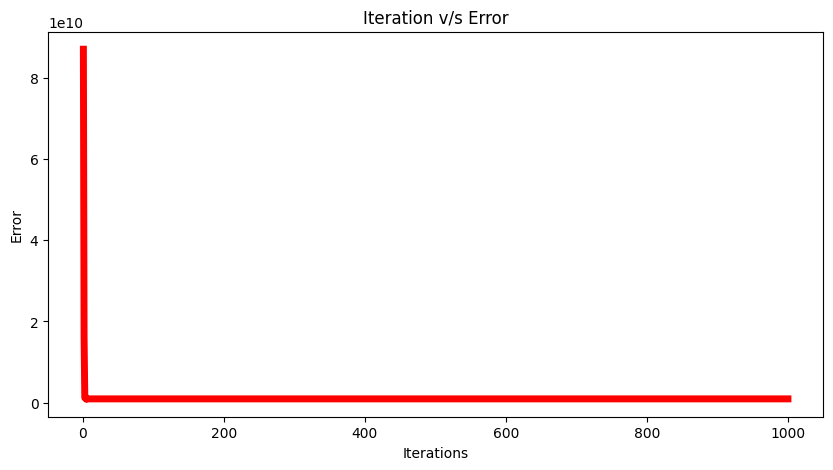

In [9]:
# Plotting the erroe during taining (error (y-axis) vs iteration(x-axis))
plt.figure(figsize=(10,5))
plt.plot(np.arange(1,len(error)+1),error,color='red',linewidth = 5)
plt.title("Iteration v/s Error")
plt.xlabel("Iterations")
plt.ylabel("Error")

In [10]:
# We see a downward curve here, as MSE decrreases with iterations, showing gradient descent optimizing a0 and a1.
# the flattening line shows that the model has converged, his means the set learning rate (lr=0.001) has been eefective
#Initially, high error due to a0=0 and a1=0 

In [11]:
# Final prediction with the trained model, using the final a0 and a1
pred = a0+a1*experience
print(pred)

[ 36187.15875227  38077.15121656  39967.14368085  44692.12484158
  46582.11730587  53197.09093089  54142.08716303  56032.07962732
  56032.07962732  60757.06078805  62647.05325234  63592.04948449
  63592.04948449  64537.04571663  68317.03064522  72097.0155738
  73987.00803809  75877.00050238  81546.97789525  82491.9741274
  90051.94398456  92886.932681   100446.90253816 103281.8912346
 108006.87239533 110841.86109176 115566.84225249 116511.83848464
 123126.81210966 125016.80457395]


Text(0, 0.5, 'salary')

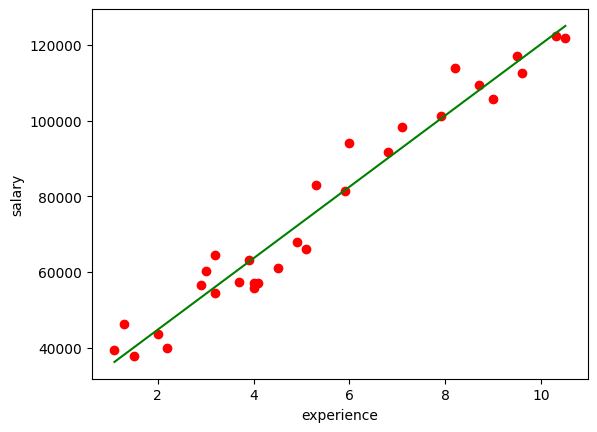

In [12]:
# Plotting the predictions to visualize the traning line
plt.scatter(experience,salary,color = 'red') #plotting the actual data
plt.plot(experience,pred, color = 'green')   #plotting the regression line(predicted salaries)
plt.xlabel("experience")
plt.ylabel("salary")

#### In the plot, green line close to red dots indicate good fit and laarge gaps indicates poor fit. Steepness of the graphs salary increase per experience year.

In [13]:
# Calculating the Mean Squared Error(MSE) to measure model frequency
n=len(experience)
error1 = salary - pred  # calculates differnce b/w actual and predicted salaries
se = np.sum(error1 ** 2)
mse = se/n
print("mean squared error is", mse)

mean squared error is 31270951.722280964


#### Linear Regression Model traning using scikit-learn to compare

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
experience = experience.reshape(-1,1)
model = LinearRegression()
model.fit(experience,salary)
salary_pred = model.predict(experience)
Mse = mean_squared_error(salary, salary_pred)
print('Slope', model.coef_)
print("Intercept", model.intercept_)
print("MSE", Mse)

Slope [9449.96232146]
Intercept 25792.20019866871
MSE 31270951.722280968
